# Larry Gu

## Research question/interests
According to NOAA's National Weather Service's [article](https://w1.weather.gov/glossary/index.php?word=dew+point)

> - Dew Point:
(Abbrev. DWPT) - A measure of atmospheric moisture. It is the temperature to which air must be cooled in order to reach saturation (assuming air pressure and moisture content are constant). A higher dew point indicates more moisture present in the air. It is sometimes referred to as Dew Point Temperature, and sometimes written as one word (Dewpoint).
> - Dew Point Depression:
The difference in degrees between the air temperature and the dew point.




Concerned for weather changes, I picked a data set which records weather statistics from Estes Park, Colorado over ten years. I will attempt to spot the existence and regularity of worrying climate changes on dew point by investigating possible drastic changes of dewpoint and dewpoint depressions over ten years and try to explain why they are happening.


# Milestone 3

## EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import project_functions1 as pf1

In [ ]:
path = '../data/raw/climate_data.csv'
df = pd.read_csv(path)

First we load the dataset from the folder.

In [ ]:
print(df.shape)
df.head()

(3902, 23)


,Date,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (in),Rainfall for year (in),...,Maximum humidity (%),Minimum humidity (%),Maximum pressure,Minimum pressure,Maximum windspeed (mph),Maximum gust speed (mph),Maximum heat index (°F),Date1,Month,diff_pressure
0,2009-01-01,37.8,35.0,12.7,29.7,26.4,36.8,274.0,0.0,0.0,...,4.0,27.0,29.762,29.596,41.4,59.0,40.0,2009-01-01,1,0.166
1,2009-01-02,43.2,32.0,14.7,29.5,12.8,18.0,240.0,0.0,0.0,...,4.0,16.0,29.669,29.268,35.7,51.0,52.0,2009-01-02,1,0.401
2,2009-01-03,25.7,60.0,12.7,29.7,8.3,12.2,290.0,0.0,0.0,...,8.0,35.0,30.232,29.260,25.3,38.0,41.0,2009-01-03,1,0.972
3,2009-01-04,9.3,67.0,0.1,30.4,2.9,4.5,47.0,0.0,0.0,...,7.0,35.0,30.566,30.227,12.7,20.0,32.0,2009-01-04,1,0.339
4,2009-01-05,23.5,30.0,-5.3,29.9,16.7,23.1,265.0,0.0,0.0,...,5.0,13.0,30.233,29.568,38.0,53.0,32.0,2009-01-05,1,0.665


The dataset is 3902 rows by 23 columns. I notice that Date1 is purely redundant. I will remove this in the future. 

As columns in this dataframe have very long names, and many of them have spaces in between. It may cause trouble in EDA. So, I will update the column names data before I proceed.

In [ ]:
df_new = pf1.update_column(path)
df_new.head()

,Date,avg_tem,avg_hum,avg_dew,avg_bar,avg_win,avg_gus,avg_dir,rfm,rfy,...,max_hum,min_hum,max_pre,min_pre,max_win,max_gus,max_hea,Date1,Month,dif_p
0,2009-01-01,37.8,35.0,12.7,29.7,26.4,36.8,274.0,0.0,0.0,...,4.0,27.0,29.762,29.596,41.4,59.0,40.0,2009-01-01,1,0.166
1,2009-01-02,43.2,32.0,14.7,29.5,12.8,18.0,240.0,0.0,0.0,...,4.0,16.0,29.669,29.268,35.7,51.0,52.0,2009-01-02,1,0.401
2,2009-01-03,25.7,60.0,12.7,29.7,8.3,12.2,290.0,0.0,0.0,...,8.0,35.0,30.232,29.260,25.3,38.0,41.0,2009-01-03,1,0.972
3,2009-01-04,9.3,67.0,0.1,30.4,2.9,4.5,47.0,0.0,0.0,...,7.0,35.0,30.566,30.227,12.7,20.0,32.0,2009-01-04,1,0.339
4,2009-01-05,23.5,30.0,-5.3,29.9,16.7,23.1,265.0,0.0,0.0,...,5.0,13.0,30.233,29.568,38.0,53.0,32.0,2009-01-05,1,0.665


Now the column names are all updated according to this:

      "Average temperature (°F)":"avg_tem",
      "Average humidity (%)":"avg_hum",
      "Average dewpoint (°F)":"avg_dew",
      "Average barometer (in)":"avg_bar",
      "Average windspeed (mph)":"avg_win",
      "Average gustspeed (mph)":"avg_gus",
      "Average direction (°deg)":"avg_dir",
      "Rainfall for month (in)":"rfm",
      "Rainfall for year (in)":"rfy",
      "Maximum rain per minute":"max_rai",
      "Maximum temperature (°F)":"max_tem",
      "Minimum temperature (°F)":"min_tem",
      "Maximum humidity (%)":"max_hum",
      "Minimum humidity (%)":"min_hum",
      "Maximum pressure":"max_pre",
      "Minimum pressure":"min_pre",
      "Maximum windspeed (mph)":"max_win",
      "Maximum gust speed (mph)":"max_gus",
      "Maximum heat index (°F)":"max_hea",
      "diff_pressure":"dif_p"
It will make code writing much easier. 

In [ ]:
df_new['Year'] = df_new.apply(lambda x: pd.to_datetime(x.Date).date().year, axis=1)

I have added a year column just in case I am going to need it.

Now I will look at general trends in the data to see if there is anything noticeable.

In [ ]:
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
avg_tem,3902.0,44.670733,15.326793,-12.100,33.700,45.100,58.0000,76.300
avg_hum,3902.0,48.878011,17.438153,9.000,36.000,47.000,61.0000,94.000
avg_dew,3902.0,23.127037,14.634088,-22.200,12.100,22.500,35.4000,55.100
avg_bar,3902.0,29.881420,0.250395,28.200,29.700,29.900,30.0000,31.000
avg_win,3902.0,5.758893,4.022485,0.000,2.700,4.600,8.0000,26.400
avg_gus,3902.0,10.011968,14.117446,0.000,4.500,7.100,12.1000,240.400
avg_dir,3902.0,216.037417,97.677761,0.000,116.000,253.000,282.0000,360.000
rfm,3902.0,0.451105,0.603462,0.000,0.050,0.220,0.6700,4.480
rfy,3902.0,5.486171,4.534444,0.000,0.980,5.080,9.0475,16.410
max_rai,3902.0,0.000000,0.000000,0.000,0.000,0.000,0.0000,0.000


Note that this data is from Estes Park, Colorado. So temperature higher in from June to August (summer) and lower in December to Feburary (winter). Dewpoint is strongly related to temperature and humidity according to NOAA's National Weather Services' definition. So I will focus on these values first.

Looking at humidity values, we can see that five number summary of avergae humidites are 9, 36, 47,61 and 94 percents, with maximum humidity median around 81 and miminum humidity median around 32, the data suggests that the park is relatively dry over the year. And maximum rainfall per minute is 0 throughout the year would suggest the same thing.

Now if we look at average temperature, five number summary of it is -12.1, 33.7, 45.1, 58.0, 76.3 F. and maximum of temperature only 92.7 suggests that the park is relatively cold through out the year.

Average dewpoint readings are -22.200, 12.100, 22.500, 35.4000, and 55.100, all approximately 10 F below temperature readings with the highest difference at about 20 F at lower quartile. It is unlikely for it to happen in winter when the temperature is lowest, I assume that there is a humidity drop with respect to temperature before or after winter.

By how the dewpoints are defined, humidity and temperature are relevent to dewpoints. So as intended, the standard deviation of those three are very close: 14.634088, 15.326793, and 17.438153 respectively. It is very interesting though, reading from the standard deviations from the average gustspeed, it is 14.117446, which is even closer to dewpoint's std.

I want to study if dewpoint are changing more drastically over years and see if there are explanations for it. So I will leave out less relevant datas from now on and keep average gustspeed in just in case for reasons mentioned above.

Now, I will start with more visualizations to get better understandings of this dataset. Start with plotting the correlation strength between weather parameters.

Text(0.5, 1.0, 'Correlation strength between weather parameters at Estes Park, Colorado')

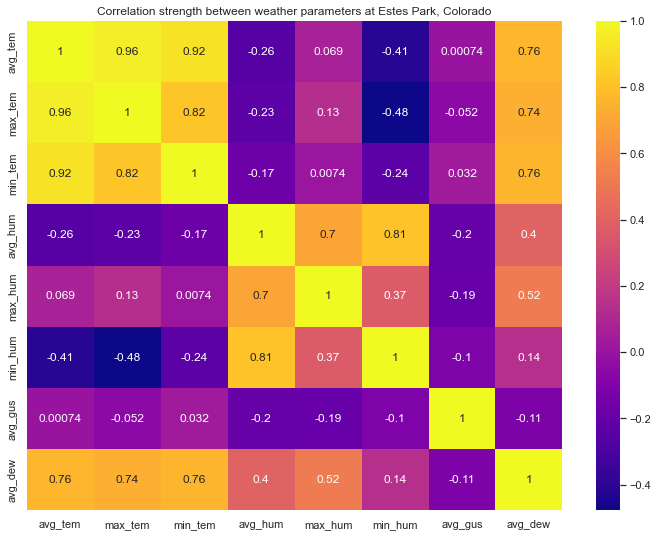

In [ ]:
df_coor=df_new[['avg_tem','max_tem','min_tem','avg_hum','max_hum','min_hum','avg_gus','avg_dew']].corr()
sns.set(rc={'figure.figsize':(12,9)})
sns.heatmap(df_coor, annot=True, cmap='plasma')
plt.title("Correlation strength between weather parameters at Estes Park, Colorado")

Correlations between temperature data and average dewpoint are 0.76 0.74 0.76, slighly higher than the correlations between humidity data and average dewpoint which are 0.4 0.52 0.14. It suggests that temperatures and humidities are all positively correlated to average dewpoints with temperatures having a stronger bond.

Humidity in general have a weak negative correlation to temperature. As they all map to values of value from 0.13 to -0.48. This discripancy between the first and second observation might come as a result of season changinng.

Average gustspeed, though has a similar standard deviation to average dewpoint, it merely has a similar flucation level. The correlation strength of it is very close to 0 for all cases with absolute value peaksed at 0.19, suggesting that this is an irrelevant variable in this analysis. I will leave it out from now on.

Text(0.5, 1.01, 'Pair wise relationships between temperature and humidity in different month at Estes Park, Colorado')

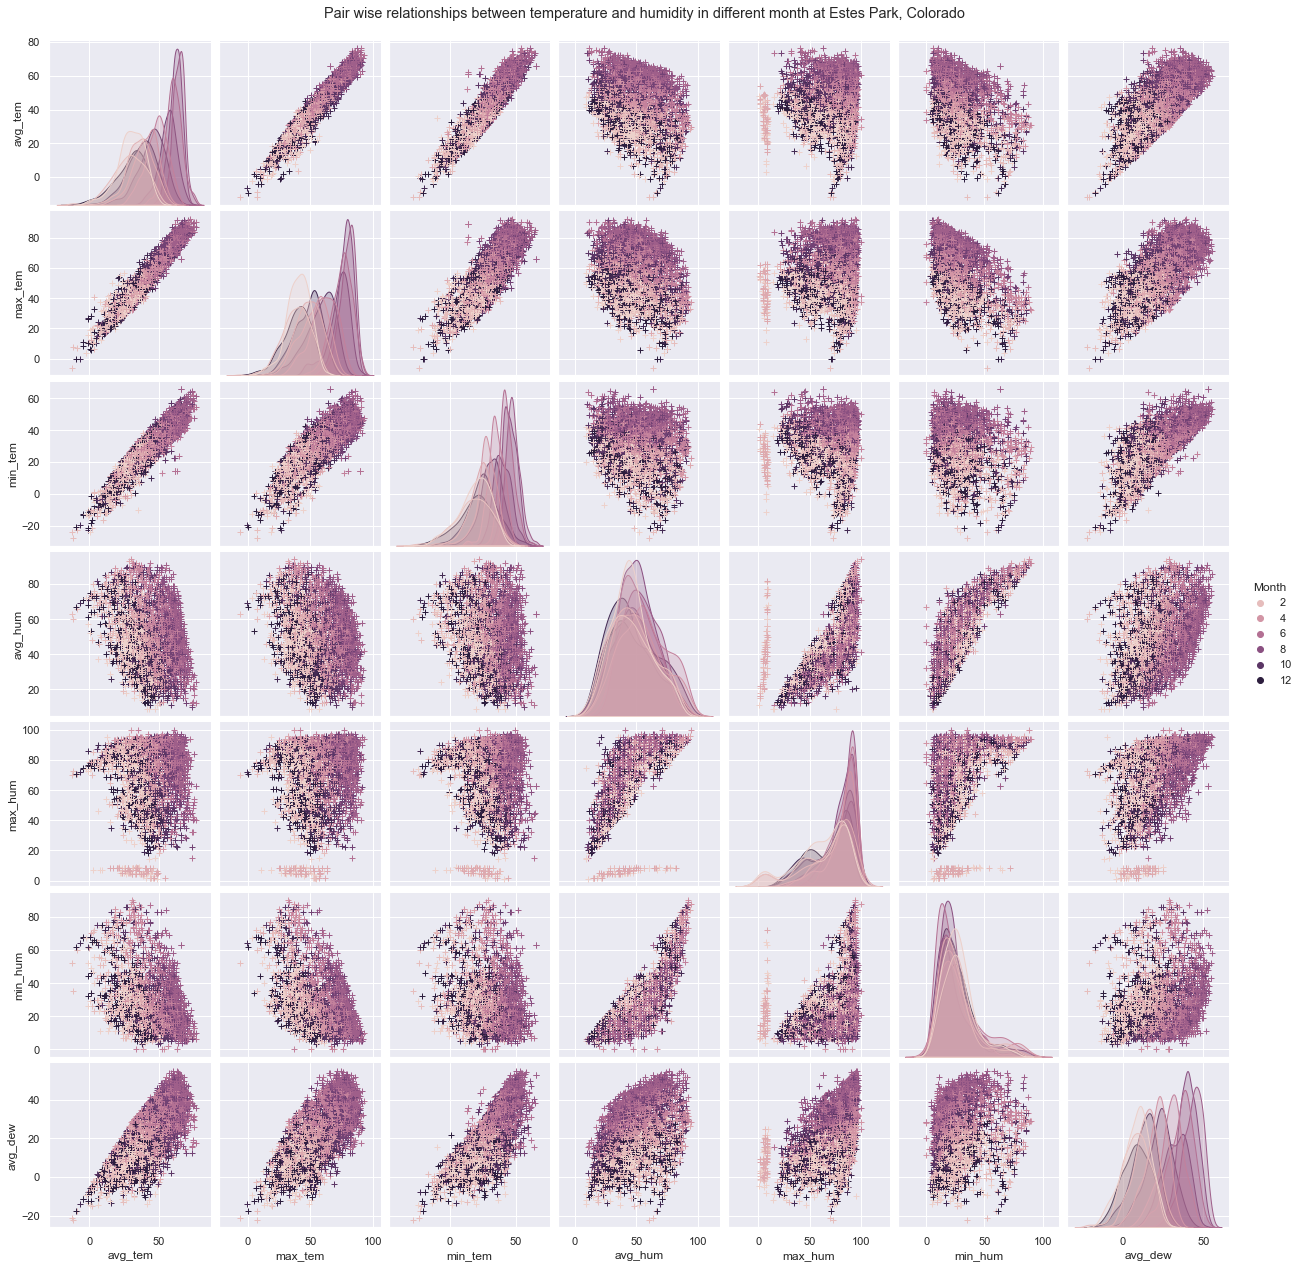

In [ ]:
df_month = df_new[['avg_tem','max_tem','min_tem','avg_hum','max_hum','min_hum','avg_dew','Month']]

(sns
 .pairplot(df_month,
           hue="Month" ,plot_kws=dict(marker="+", linewidth=1))
 .fig.suptitle(
     t='Pair wise relationships between temperature and humidity in different month at Estes Park, Colorado',
     y= 1.01)
)

Temperatures are in degree fahrenheit, humidity is in %

Reading from the diagonal, from top left to bottom right, we can see that temperatures first. They are changing over month, the distributions are all very close to normal distribution in each month. The minimum and maximum are all relatively close to average. In Feburary, teperature are centered around 25 F, in June, temperautre peaks at around 60 F. In December, temperature falls back to around 25 F. On the other hand, the reading on humidity are very different. Humidity distributions are relatively close to each other over different months. Average humidity is close to normal distribution with mode close to 50. Max humidity is left skewed with mode aroound 90. Min humidity is right skewed with mode around 20. 

With the information above, we can tell roughly how weather is in Estes Park, Colorado: in a single day, temperature is relatively consistent. In different months, temperature would be higher at summer at around 60 F and around 25 F at winter. Humidity would normally peak around 90 and gets as low as 20 in all days.

The findings are consistent with the pair wise graph for average humidity and average temperature at the row 4 column 1. In June (summer) the readings of temperature are high at around 60 F and in December (winter) the readings of temperature are lowat around 20F. In all month, humidity readings distributes most closely at the middle at around 50 and spreads evenly to 0 and 100.


Reading from avgerate dewpoints, we can see that it gets higher in summer at around 30 F and lower at winter at around 10 F. Distribution changes along season like temperature does. The size of one standard deviations are very close to each other over different months, this is similar to the behavior average humidity (whereas it is different for temperature).

One concerning finding is that in the graphs related to maximum humidity, the values falls below 10 only in Feburary for a small group of data. I am assuming it is either due to recording error, or there was a severe weather took place one year during 2008 to 2020 at the park. I will look into this.

In [ ]:
df_mh = df_new.loc[df_new.max_hum<20][['Date','avg_hum','min_hum','max_hum','Year','Month']]

I first filtered out all the rows where max humidty comes below 20% as mentioned above. Next I plot them in a catplot where x axis is humidity, y axis is month, colored by year to see two things: 
- In which of the years is it happening?
- In which of the months is it happening?

So that I can see if it if is happening yearly, or it may just be misrecorded data.

<seaborn.axisgrid.FacetGrid>

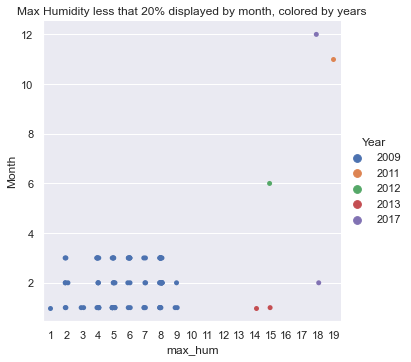

In [ ]:
(sns.catplot(data=df_mh, x="max_hum",hue="Year",y='Month',order=range(1,20))
 .set(title='Max Humidity less that 20% displayed by month, colored by years'))

We can see a huge group by blue dots at the bottom left corner. This means most of the "outliers" happens in 2009. As the quantity of data is distributed in a huge amount and spread evenly from 1 to 9 % in humidity and January to December in month. Additionally, max humidity below 10 is only happening for 2009 alone. I suspect this is falsely recorded data.

In [ ]:
df_mh.loc[df_mh.max_hum<df_mh.min_hum].groupby(by='Year').count()

,Date,avg_hum,min_hum,max_hum,Month
Year,,,,,
2009,86,86,86,86,86


We can see that if we count among the days where max_humdity falls below 20% to see if max humidity goes less than min humidity, 2009 shows up alone. As max humidity going below min humidity is impossible the values are outliers. For easier analysis of the data set, I will remove data in 2009 entirely to get rid of the outliers.

<!-- The shape of both graphs are rather rounded and close to the center of the graphs.
Suggesting that the all three distributions are close to normal distribution.
It is interesting though, that there are two cluters on both graph (where the color of the area is darkest).
It might suggest that during winter and summer, the values are relatively close to each other. But during intermediate periods, they both changes in the same direction. -->

## Data Analysis Pipeline

First, as stated before, I will load the data with updated columns

In [ ]:
df_2 = pf1.update_column(path)
print(df_2.head())

         Date  avg_tem  avg_hum  avg_dew  avg_bar  avg_win  avg_gus  avg_dir  \
0  2009-01-01     37.8     35.0     12.7     29.7     26.4     36.8    274.0   
1  2009-01-02     43.2     32.0     14.7     29.5     12.8     18.0    240.0   
2  2009-01-03     25.7     60.0     12.7     29.7      8.3     12.2    290.0   
3  2009-01-04      9.3     67.0      0.1     30.4      2.9      4.5     47.0   
4  2009-01-05     23.5     30.0     -5.3     29.9     16.7     23.1    265.0   

   rfm  rfy  ...  max_hum  min_hum  max_pre  min_pre  max_win  max_gus  \
0  0.0  0.0  ...      4.0     27.0   29.762   29.596     41.4     59.0   
1  0.0  0.0  ...      4.0     16.0   29.669   29.268     35.7     51.0   
2  0.0  0.0  ...      8.0     35.0   30.232   29.260     25.3     38.0   
3  0.0  0.0  ...      7.0     35.0   30.566   30.227     12.7     20.0   
4  0.0  0.0  ...      5.0     13.0   30.233   29.568     38.0     53.0   

   max_hea       Date1  Month  dif_p  
0     40.0  2009-01-01      1  0.16

As planned, I will first remove Date1 as it is purely redundant. And also remove other data that I am not using.

In [ ]:
df_2 = df_2.drop(['rfm','rfy', 'Date1','avg_bar','avg_win','avg_gus','avg_dir','max_rai','max_pre','min_pre','max_win','dif_p','max_gus'], axis=1).dropna(axis=0)
df_2.head()

,Date,avg_tem,avg_hum,avg_dew,max_tem,min_tem,max_hum,min_hum,max_hea,Month
0,2009-01-01,37.8,35.0,12.7,40.0,34.0,4.0,27.0,40.0,1
1,2009-01-02,43.2,32.0,14.7,52.0,37.0,4.0,16.0,52.0,1
2,2009-01-03,25.7,60.0,12.7,41.0,6.0,8.0,35.0,41.0,1
3,2009-01-04,9.3,67.0,0.1,19.0,-0.0,7.0,35.0,32.0,1
4,2009-01-05,23.5,30.0,-5.3,30.0,15.0,5.0,13.0,32.0,1


Now, to analyze avgerage dewpoint according to dates easier, I want to update the date to datetime object

In [ ]:
df_2['date_obj'] = df_2.apply(lambda x: pd.to_datetime(x.Date).date(), axis=1)
print('The type of date is now',type(df_2['date_obj'][0]))

The type of date is now <class 'datetime.date'>


With the date object column, I can easily generate the year column. (but I will still keep the date object row just for reference)

In [ ]:
df_2['Year'] = df_2.apply(lambda x: x.date_obj.year, axis=1)

Now I will the dewpoint depression, and dew range column, which will be analyzed further.

In [ ]:
df_2['dep_dew'] = df_2.apply(lambda x: x.avg_tem-x.avg_dew, axis=1)

Dewpoint range is estimated through subtracting maximum dewpoint possible and minimum dewpoint possible

In [ ]:
df_2['ran_dew'] = df_2.apply( lambda x: (((x.max_tem - 32) * 5/9-(100-x.max_hum)/5)-((x.min_tem - 32) * 5/9-(100-x.min_hum)/5))*1.8+32 , axis = 1)

Drop the Date column as I already have the more handy date_obj

In [ ]:
df_2 = df_2.drop(['Date'], axis=1).dropna(axis=0)

Drop the data in 2009 as it contains outliers, 2020 as it does not contain all the 12 months.

In [ ]:
df_2 = df_2.drop(df_2[df_2.Year == 2009].index).drop(df_2[df_2.Year == 2020].index)

Lastly, reset index so it looks nicer

In [ ]:
df_2=df_2.reset_index(drop=True)
df_2.head()

,avg_tem,avg_hum,avg_dew,max_tem,min_tem,max_hum,min_hum,max_hea,Month,date_obj,Year,dep_dew,ran_dew
0,32.1,49.0,15.2,40.0,22.1,61.0,41.0,40.0,1,2010-01-01,2010,16.9,57.10
1,32.1,50.0,15.5,39.1,22.0,77.0,39.0,39.1,1,2010-01-02,2010,16.6,62.78
2,23.1,64.0,12.1,33.4,9.2,85.0,34.0,33.4,1,2010-01-03,2010,11.0,74.56
3,25.7,48.0,7.2,36.5,7.6,82.0,25.0,36.5,1,2010-01-04,2010,18.5,81.42
4,34.3,51.0,17.8,40.1,28.4,60.0,43.0,40.1,1,2010-01-05,2010,16.5,49.82


You can now see that the Data is updated, and it is now with all I need.

## Method Chaining

Start by removing all the redundant variables and load the dataset again

In [ ]:
reset -f

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import project_functions1 as pf1

In [ ]:
path = '../data/raw/climate_data.csv'

In [ ]:
df_3 = pf1.load_and_process(path)
df_3.head()

,avg_tem,avg_hum,avg_dew,max_tem,min_tem,max_hum,min_hum,max_hea,Month,date_obj,Year,dep_dew,ran_dew
0,32.1,49.0,15.2,40.0,22.1,61.0,41.0,40.0,1,2010-01-01,2010,16.9,57.10
1,32.1,50.0,15.5,39.1,22.0,77.0,39.0,39.1,1,2010-01-02,2010,16.6,62.78
2,23.1,64.0,12.1,33.4,9.2,85.0,34.0,33.4,1,2010-01-03,2010,11.0,74.56
3,25.7,48.0,7.2,36.5,7.6,82.0,25.0,36.5,1,2010-01-04,2010,18.5,81.42
4,34.3,51.0,17.8,40.1,28.4,60.0,43.0,40.1,1,2010-01-05,2010,16.5,49.82


In [ ]:
type(df_3["date_obj"][0])

datetime.date

All done! The data set is ready to go.

## Task 4: Data Analysis

Start with an analysis on the range of the calculated dewpoint range.

In [ ]:
# sns.pointplot(data=df_3, x="date_obj", y="ran_dew",)
plt.figure(figsize=(18,8))
# sns.stripplot(data=df_3, x="avg_hum", y="dep_dew",hue="Year",marker="+", linewidth=0.8,palette='flare',order = range(0, 100, 2))

# sns.regplot(data=df_3,x="avg_hum",y="dep_dew")
sns.lmplot(data=df_3, x="avg_tem", y="ran_dew", hue="Month")
# ,jitter=True, s=20, marker="D", linewidth=0.8, alpha=.08,palette='flare'

NameError: name 'plt' is not defined

<seaborn.axisgrid.JointGrid>

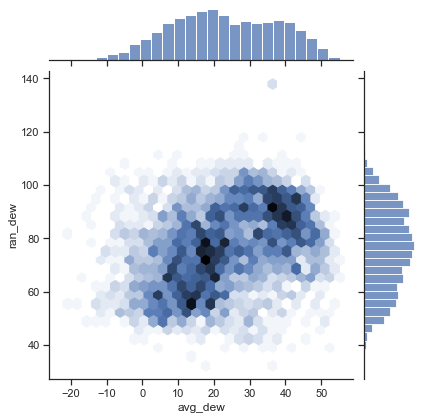

In [ ]:
sns.set_theme(style="ticks")
sns.jointplot(x='avg_dew',y='ran_dew', data=df_3, kind='hex')

# sns.jointplot(x='Month',y='avg_dew', data=df_3, kind='hex')
# plt.xlabel("Sols Elapsed")
# plt.ylabel("Max. Temp. ($\degree$C)")

Text(0.5, 1.0, 'Dewpoint Range Variations by Year at Estes Park, Colorado')

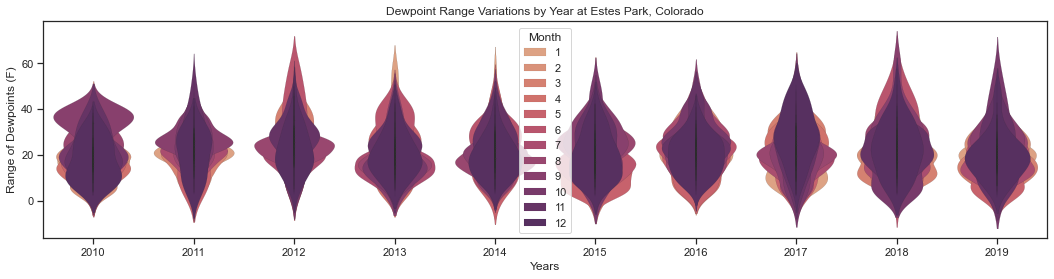

In [ ]:
plt.figure(figsize=(18,4))
sns.violinplot(data=df_3,x='Year',y='dep_dew',hue="Month",linewidth=0.1,dodge=False,palette='flare')
plt.xlabel("Years")
plt.ylabel("Range of Dewpoint Depressions (F)")
plt.title("Dewpoint Depressions Variations by Year at Estes Park, Colorado")